## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score

## Read in Dataset for EDA

In [2]:
data = pd.read_csv(r'C:\Users\Ibra\Desktop\assgt\train_2v.csv')
data1 = pd.read_csv(r'C:\Users\Ibra\Desktop\assgt\test_2v.csv') 

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [4]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [5]:
print ('# No. of people in Data:' +str(len(data.index)))

# No. of people in Data:43400


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [8]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
data.shape

(43400, 12)

In [10]:
data.isnull().sum()/len(data)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [11]:
data1.isnull().sum()/len(data1)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.177249
smoking_status       30.917693
dtype: float64

In [12]:
joined_data = pd.concat([data,data1])
print ('Joined Data Shape: {}'.format(joined_data.shape))

Joined Data Shape: (62001, 12)


In [13]:
joined_data.isnull().sum()/len(joined_data)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.311237
smoking_status       30.714021
stroke               30.001129
dtype: float64

## Further visualization on the data

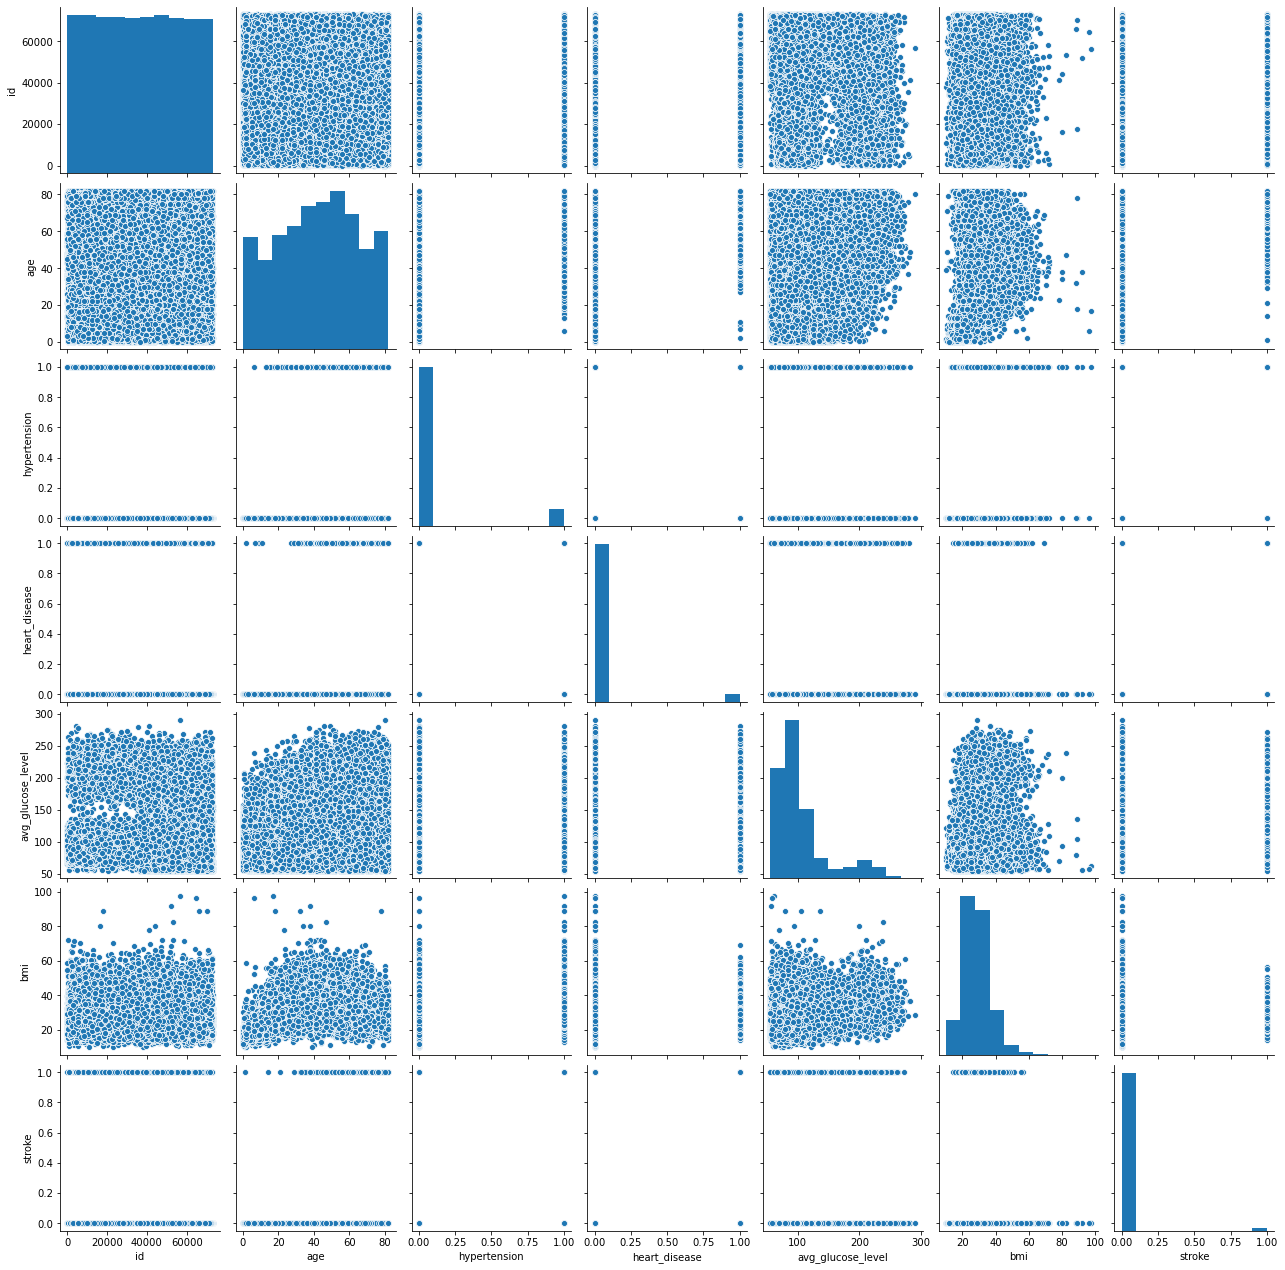

In [14]:
sns.pairplot(data)

0    42617
1      783
Name: stroke, dtype: int64

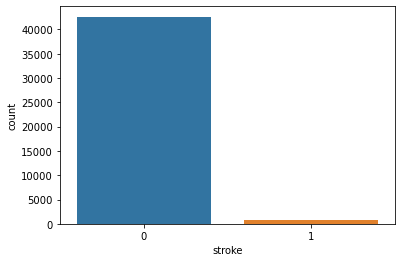

In [15]:
sns.countplot(x='stroke', data=data)
data.stroke.value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

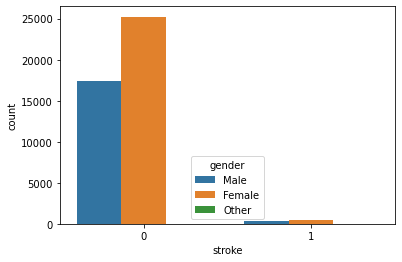

In [16]:
sns.countplot(x='stroke', hue='gender', data=data)
data.gender.value_counts()

0    39339
1     4061
Name: hypertension, dtype: int64

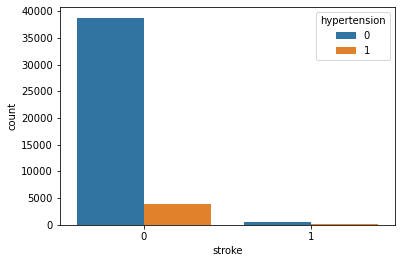

In [17]:
sns.countplot(x='stroke', hue="hypertension", data=data)
data.hypertension.value_counts()

0    41338
1     2062
Name: heart_disease, dtype: int64

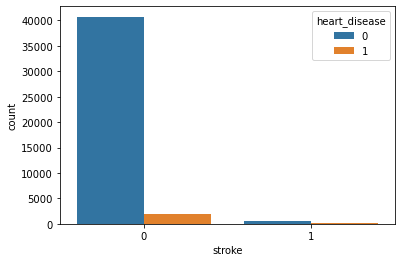

In [18]:
sns.countplot(x='stroke', hue='heart_disease', data=data)
data.heart_disease.value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

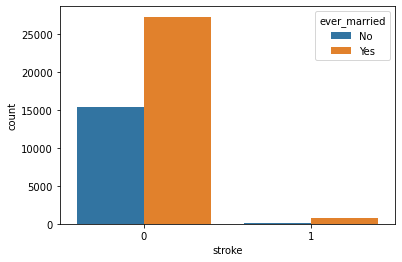

In [19]:
sns.countplot(x='stroke', hue='ever_married', data=data)
data.ever_married.value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

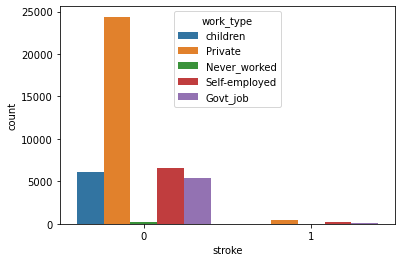

In [20]:
sns.countplot(x='stroke', hue='work_type', data=data)
data.work_type.value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

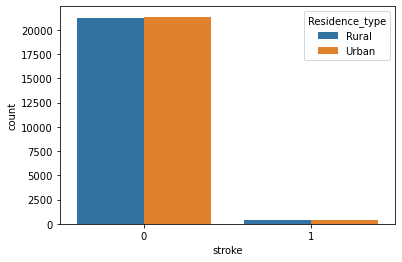

In [21]:
sns.countplot(x='stroke', hue='Residence_type', data=data)
data.Residence_type.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

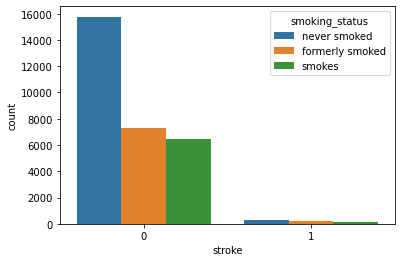

In [22]:
sns.countplot(x='stroke', hue='smoking_status', data=data)
data.smoking_status.value_counts()

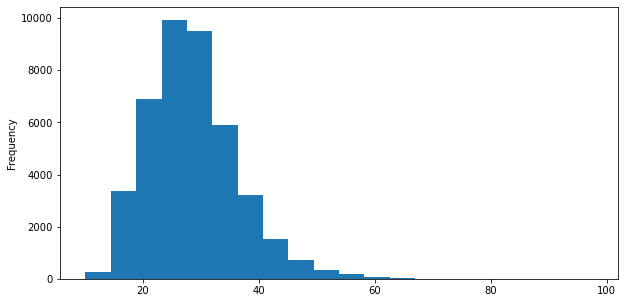

In [23]:
data['bmi'].plot.hist(bins=20, figsize=(10,5))

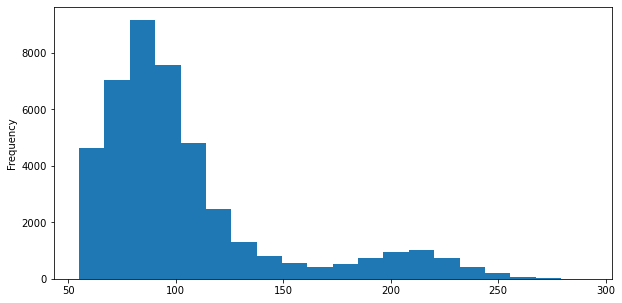

In [24]:
data['avg_glucose_level'].plot.hist(bins=20, figsize=(10,5))

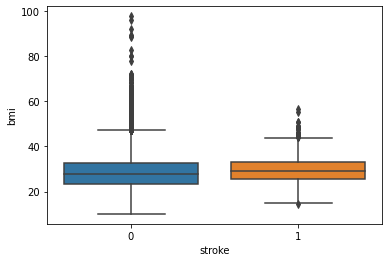

In [25]:
sns.boxplot(x='stroke', y='bmi', data=data)

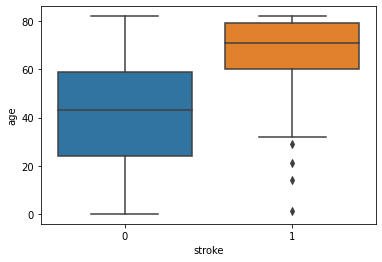

In [26]:
sns.boxplot(x='stroke', y='age', data=data)

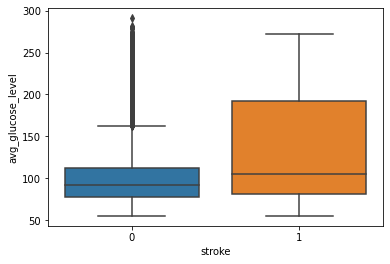

In [27]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=data)

## Cleaning the data

In [28]:
data.shape

(43400, 12)

In [29]:
data.isnull().sum()/len(data)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [30]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [31]:
index_names = data[ data['gender'] == 'Other' ].index
data.drop(index_names, inplace = True)

In [32]:
data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13290
stroke                   0
dtype: int64

In [33]:
data.shape

(43389, 12)

In [34]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
label = LabelEncoder()
data['gender'] = label.fit_transform(data['gender'])
data['ever_married'] = label.fit_transform(data['ever_married'])
data['work_type']= label.fit_transform(data['work_type'])
data['Residence_type']= label.fit_transform(data['Residence_type'])

In [37]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,NaN,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,never smoked,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,NaN,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,formerly smoked,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,NaN,0


In [38]:
data_without_smoke = data[data['smoking_status'].isnull()]
data_with_smoke = data[data['smoking_status'].notnull()]

In [39]:
data_without_smoke.drop(columns='smoking_status',axis=1,inplace=True)

C:\Users\Ibra\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
data_without_smoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,0
5,32257,0,47.0,0,0,1,2,1,210.95,50.1,0
10,10460,0,79.0,0,0,1,0,1,77.08,35.0,0


In [41]:
data_with_smoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,never smoked,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,formerly smoked,0
6,52800,0,52.0,0,0,1,2,1,77.59,17.7,formerly smoked,0
7,41413,0,75.0,0,1,1,3,0,243.53,27.0,never smoked,0
8,15266,0,32.0,0,0,1,2,0,77.67,32.3,smokes,0


In [42]:
data_with_smoke['smoking_status']= label.fit_transform(data_with_smoke['smoking_status'])

<ipython-input-42-bf99d3cd7496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_smoke['smoking_status']= label.fit_transform(data_with_smoke['smoking_status'])


In [43]:
data_with_smoke.shape

(30099, 12)

                         id    gender       age  hypertension  heart_disease  \
id                 1.000000  0.005527  0.000112      0.002149       0.013071   
gender             0.005527  1.000000  0.041757      0.037852       0.097948   
age                0.000112  0.041757  1.000000      0.259491       0.251810   
hypertension       0.002149  0.037852  0.259491      1.000000       0.114934   
heart_disease      0.013071  0.097948  0.251810      0.114934       1.000000   
ever_married       0.000071  0.025847  0.546838      0.133198       0.098191   
work_type          0.008934  0.009952  0.019134      0.019348       0.034497   
Residence_type    -0.000869  0.004937  0.004006     -0.004441      -0.000591   
avg_glucose_level  0.020962  0.053930  0.230641      0.154675       0.139432   
bmi                0.013239  0.019583  0.101426      0.120716       0.018544   
smoking_status     0.004022 -0.012879 -0.148311     -0.030186      -0.035725   
stroke             0.002235  0.013857  0

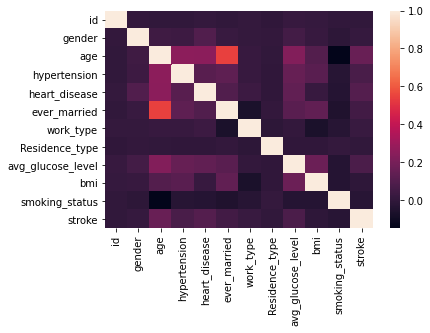

In [44]:
corr = data_with_smoke.corr('pearson')
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [45]:
data_with_smoke['stroke'].value_counts()

0    29461
1      638
Name: stroke, dtype: int64

In [46]:
data_without_smoke['stroke'].value_counts()

0    13145
1      145
Name: stroke, dtype: int64

## Handling imbalance data

In [47]:
ros = RandomOverSampler(random_state=0)
smote = SMOTE()

In [48]:
X_resampled, y_resampled = ros.fit_resample(data_with_smoke.loc[:,data_with_smoke.columns!='stroke'], 
                                            data_with_smoke['stroke'])

In [49]:
print ('ROS Input Data Shape for Smoke Data: {}'.format(X_resampled.shape))
print ('ROS Output Data Shape for Smoke Data: {}'.format(y_resampled.shape))


ROS Input Data Shape for Smoke Data: (58922, 11)
ROS Output Data Shape for Smoke Data: (58922,)


In [50]:
X_resampled_1, y_resampled_1 = ros.fit_resample(data_without_smoke.loc[:,data_without_smoke.columns!='stroke'], 
                                            data_without_smoke['stroke'])

In [51]:
print ('ROS Input Data Shape for Non Smoke Data: {}'.format(X_resampled_1.shape))
print ('ROS Output Data Shape for Non Smoke Data: {}'.format(y_resampled_1.shape))

ROS Input Data Shape for Non Smoke Data: (26290, 10)
ROS Output Data Shape for Non Smoke Data: (26290,)


## Train Test Split of the balanced Data

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(47137, 11)
(11785, 11)


In [53]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_resampled_1,y_resampled_1,test_size=0.2)
print(X_train_1.shape)
print(X_test_1.shape)

(21032, 10)
(5258, 10)


## Model

 ### Using Logistic regression for Smoking Status

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      5887
           1       0.69      0.75      0.72      5898

    accuracy                           0.71     11785
   macro avg       0.71      0.71      0.71     11785
weighted avg       0.71      0.71      0.71     11785

0.7071701315231226
[[3897 1990]
 [1461 4437]]
precision =  0.6903687568072195 
 recall =  0.7522889114954222


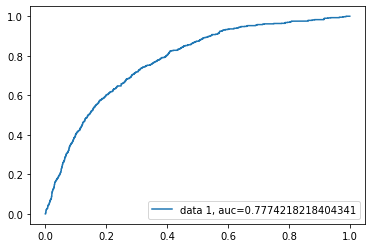

                   Importance
age                  0.050275
avg_glucose_level    0.003937
heart_disease        0.002017
hypertension         0.001533
id                  -0.000008
gender              -0.000687
ever_married        -0.001034
Residence_type      -0.001602
smoking_status      -0.004237
work_type           -0.004857
bmi                 -0.100310


In [54]:
log = LogisticRegression(penalty='l2', C=0.1)
log.fit(X_train,y_train)

pred = log.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = log.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
impFeatures = pd.DataFrame(log.coef_[0] ,index=data_with_smoke.loc[:,data_with_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

### Logistic Regression with no smoking status

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      2621
           1       0.78      0.87      0.82      2637

    accuracy                           0.81      5258
   macro avg       0.82      0.81      0.81      5258
weighted avg       0.82      0.81      0.81      5258

0.8136173449980981
[[1978  643]
 [ 337 2300]]
precision =  0.781515460414543 
 recall =  0.8722032612817596


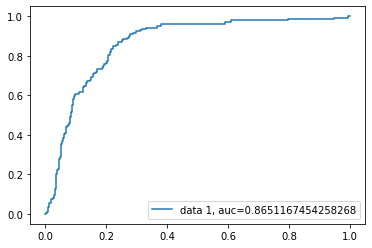

                   Importance
age                  0.072303
heart_disease        0.002045
hypertension         0.000884
ever_married         0.000407
id                  -0.000013
gender              -0.000697
avg_glucose_level   -0.000957
Residence_type      -0.002213
work_type           -0.014857
bmi                 -0.101129


In [55]:
logg = LogisticRegression(penalty='l2', C=0.1)
logg.fit(X_train_1,y_train_1)

pred = logg.predict(X_test_1)
print(classification_report(y_test_1,pred))
print (accuracy_score(y_test_1,pred))
print (confusion_matrix(y_test_1,pred))

precision = precision_score(y_test_1,pred)
recall = recall_score(y_test_1,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = logg.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba)
auc = roc_auc_score(y_test_1, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

impFeatures = pd.DataFrame(logg.coef_[0] ,index=data_without_smoke.loc[:,data_without_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)